<a href="https://colab.research.google.com/github/Ranjith45495/Mini-Project/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

VELURU RANJITH

In [55]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize



time: 2.54 ms (started: 2021-03-30 05:56:36 +00:00)


In [56]:
target = []
images = []
flat_data = []
DATADIR ='/content/images'
CATEGORIES = ['alien','cats']


time: 2.41 ms (started: 2021-03-30 05:56:37 +00:00)


In [57]:
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

time: 715 ms (started: 2021-03-30 05:56:40 +00:00)


In [58]:
print(target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
time: 1.32 ms (started: 2021-03-30 05:56:42 +00:00)


In [59]:
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
flat_data[0]

array([0.81208601, 0.76894876, 0.80032131, ..., 0.10367085, 0.13135712,
       0.19339634])

time: 37.6 ms (started: 2021-03-30 05:56:44 +00:00)


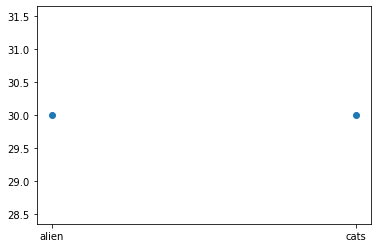

time: 145 ms (started: 2021-03-30 05:56:47 +00:00)


In [60]:
unique,count = np.unique(target,return_counts=True)
plt.plot(CATEGORIES,count,'o')

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=110)

time: 21.2 ms (started: 2021-03-30 05:56:49 +00:00)


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [ 
              {'C':[1,101,100,1000],'kernel':['linear']},
               {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability = True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 101, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 40 s (started: 2021-03-30 05:56:51 +00:00)


In [63]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0])

time: 78.4 ms (started: 2021-03-30 05:57:32 +00:00)


In [64]:
y_test

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0])

time: 3.57 ms (started: 2021-03-30 05:57:32 +00:00)


In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.7777777777777778

time: 9.55 ms (started: 2021-03-30 05:57:37 +00:00)


In [67]:
confusion_matrix(y_pred,y_test)

array([[8, 3],
       [1, 6]])

time: 11.6 ms (started: 2021-03-30 05:57:39 +00:00)


In [68]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 47.3 ms (started: 2021-03-30 05:57:41 +00:00)


In [69]:
model = pickle.load(open('img_model.p','rb'))

time: 24.4 ms (started: 2021-03-30 05:57:42 +00:00)


enter your urlhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTUg5Cp_yAHzYFIgOtDiBj1idZv9xWGyffBIQ&usqp=CAU
(290, 174, 3)
Model predicition: alien


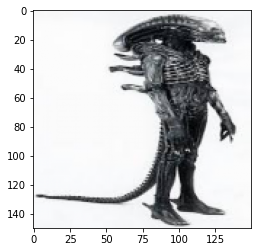

time: 2.88 s (started: 2021-03-30 05:58:23 +00:00)


In [72]:
flat_data = []
url = input("enter your url")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Model predicition: {y_out}')